In [2]:
import sounddevice as sd


from source.processing import *
from config.settings import PROCESSING
from utils.plotting import plot_spectrogram

In [3]:
x_train, y_train, x_test, y_test, scalars = load_split_tensors(PROCESSING.tensors_folder)

In [4]:
x_train[0].shape

(512, 256, 2)

In [5]:
freq = fft_frequencies(sr=PROCESSING.sampling_rate, n_fft=PROCESSING.n_fft)
log_freq = log_scale_freq(freq, log_base=PROCESSING.log_base, num_samples=PROCESSING.num_samples)[0]

In [6]:
restored_sg_x = tensor_to_spectrogram(x_test[0], scalars['x'])

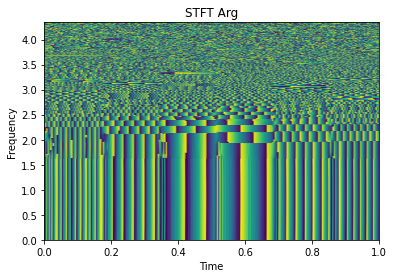

In [7]:
plot_spectrogram(log_freq, restored_sg_x, mode='Arg')

In [8]:
restored_sg_y = tensor_to_spectrogram(y_test[0], scalars['y'])

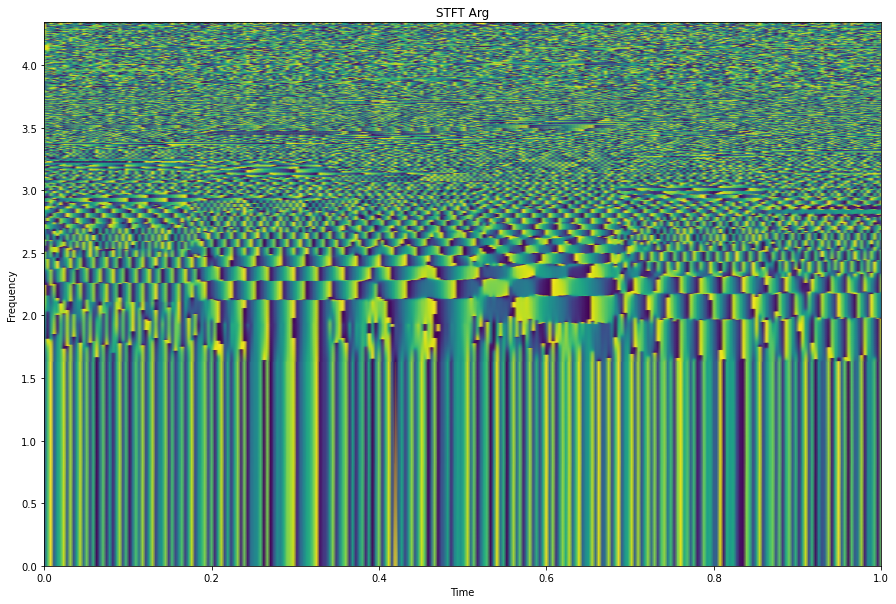

In [9]:
plot_spectrogram(log_freq, restored_sg_y, mode='Arg')

In [10]:
rescaled_x = inverse_log_scale(log_freq, restored_sg_x)

In [11]:
sig_x = spectrogram_to_wav(rescaled_x, PROCESSING.sampling_rate)(win_length=PROCESSING.win_length, n_fft=PROCESSING.n_fft)

In [12]:
sd.play(*sig_x)

In [12]:
rescaled_y = inverse_log_scale(log_freq, restored_sg_y)

In [13]:
sig_y = spectrogram_to_wav(rescaled_y, PROCESSING.sampling_rate)(win_length=PROCESSING.win_length, n_fft=PROCESSING.n_fft)

In [14]:
sd.play(*sig_y)